# CSE 5243 - Introduction to Data Mining
## Homework 2: Classification
- Semester: Fall 2022
- Instructor: John Paparrizos / Tom Bihari
- Section: Wednesday/Friday 11:10 AM
- Student Name: Yoojin Jeong
- Student Email: jeong.358@osu.edu
- Student ID: 500435642
***

# Introduction

### Objectives

In this lab, you will use the "Cleveland Data CLEANED AND TRIMMED.csv" heart disease dataset provided on Carmen.  It is a subset of the "Cleveland" dataset that can be found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

You will configure, execute, and evaluate an off-the-shelf K-Nearest-Neighbor classifier and two other classifiers you choose.

The objectives of this assignment are:
1.	Understand how to evaluate classifiers based on business criteria.
2.	Understand how to tune and evaluate a classifier to achieve good performance.
3.	Understand how to select and evaluate suitable off-the-shelf classifiers based on the characteristics of a dataset and the outcomes you need.

### Problem Statement

You work for a medical institution that wants to improve the heart health of its patients.  You have obtained a dataset that contains a variety of demographic and health-related information for a group of patients.  It also includes a CLASS variable "num" that indicates the heart health of each of the patients.  The values are:

0. No heart health issues / risk
1. Slight heart health issues / risk
2. Moderate heart health issues / risk
3. High heart health issues / risk
4. Extreme heart health issue / risk

You have been asked to develop a classifier based on the dataset data, to predict the CLASS of new patients so they can be enrolled in interventions based on their demographic data.

The COSTs of the interventions are as follows, based on the predicted class of each patient

0) Tiny intervention: 100 (dollars)
1) Minor intervention: 200
2) Moderate intervention: 300
3) Significant intervention: 400
4) Extreme intervention: 500

The BENEFITs of the interventions are as follows:

- If the classification is correct and the correct intervention given to the patient: 500 * (TRUE_CLASS + 1)
- If an incorrect classification is made and the wrong intervention is given to the patient: 0

You would like to find a classifier that maximizes the overall **NET_BENEFIT = BENEFIT - COST**. Therefore, a larger positive number is a good outcome.

So, for example:

- If a patient's true class is 4 and their predicted class is 0, their NET_BENEFIT = 0 - 100 = -100
- If a patient's true class is 4 and they are correctly classified, their NET_BENEFIT is 500*(4+1) - 500 = 2000

The medical institution would like you to evaluate the use of a K-Nearest-Neighbor classifier as a starting point.  You agree to do so, as long as you then can choose a different classifier if you are not satisfied with KNN.

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.

### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (5%)
> - Is it well organized and does the presentation flow in a logical manner?
> - Are there no grammar and spelling mistakes?
> - Do the charts/graphs relate to the text?
> - Are the summarized key points and findings understandable by non-experts?
> - Do the Overview and Conclusions provide context for the entire exercise?
2.	Evaluation Method (10%)
> - Does your evaluation method meet the needs of the developer (you) as well as the needs of your business stakeholders?
> - Is the evaluation method sound?
> - Did you describe both the method itself and why you chose it?
3.	Pre-Processing of the Dataset (10%)
> - Did you make reasonable choices for pre-processing, and explain why you made them?
4.	Evaluation of the KNN Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
5.	Evaluation of the Second Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
6.	Evaluation of the Third Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
7.	Comparison of the Three Classifiers (10%)
> - Is the comparison sound?
> - Did you choose a specific classifier as best and explain why?
8.  Conclusions (5%)
> - Did you summarize appropriately your critical findings. 
> - Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	Project2_Surname_DotNumber.zip

The submitted file should be less than 10MB.

***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

In the given heart disease dataset, 

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

cleveland = pd.read_csv("Cleveland Data CLEANED AND TRIMMED.csv")
clev = cleveland.copy()
clev

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,278,39,0,3,138,220,0,0,152,0,0.0,2,0,3,0
278,279,57,1,2,154,232,0,2,164,0,0.0,1,1,3,1
279,280,58,0,4,130,197,0,0,131,0,0.6,2,0,3,0
280,281,57,1,4,110,335,0,0,143,1,3.0,2,1,7,2


***
# Section: 1 - Evaluation Method
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
- (e.g., confusion matrices, accuracy, precision, recall, F-measures, etc.).
- Consider using: from sklearn.metrics import classification_report, confusion_matrix
***

### Confusion matrix
Confusion matrix is a table that summarizes prediction results of classification.\
5 columns with 5 predicted values(num=0 to num=4).\
5 rows with 5 true values(num=0 to num=4).

### Precision
Precision = positive predictive value = true positive / (true positive + false positive)\
\
Ex) Precision of classification for num=0 (no heart issues)\
Number of correctly classified as num=0 divided by all valued classified as num=0.


### Accuracy
Accuracy = (True Positive + True Negative) / (Ture Positive + Ture Negative + False Positive + False Negative)\
\
Ex) Sum of the number of correctly classified in Positive and the number of correctly classified in Negative devided by all values in the confusion matrix.


### Recall
Recall = Sensitivity = Ture Positive / (True Positive + False Negative)\
\
Ex) Recall of classification for num=0 (no heart issues)\
Number of correctly classified as num=0 divided by the sum of first row of matrix(true value = 0).

### F-Measures
F-measure = 2 * (Recall * Precision) / (Recall + Precision)
= balanced mean between precision and recall

***
## Section: 1.2 - Define measures that do include the cost information
- (e.g., using cost matrices).
- Consider creating a function that takes a confusion matrix and calculates the cost, like this:
***

In [2]:
def calculate_cost(conf_matrix):
# Fill in the cost matrix values
#                           PREDICTED VALUES
#                      0     1     2     3     4
     cost_matrix = [[400, -200, -300, -400, -500],   # 0
                    [-100, 800, -300, -400, -500],   # 1
                    [-100, -200, 1200, -400, -500],   # 2  TRUE VALUES
                    [-100, -200, -300, 1600, -500],   # 3
                    [-100, -200, -300, -400, 2000]]   # 4
     total = 0
     for r in range(0, 5):
         for c in range(0, 5):
             total = total + cost_matrix[r][c] * conf_matrix[r][c]

# OR... THIS WORKS      total = np.dot(np.array(conf_matrix).ravel(), np.array(cost_matrix).ravel())
     return total

cost_matrix is calculated by putting each predicted values and true values in the BENEFIT function and NET_BENEFIT function given from the instruction.

***
# Section: 2 - Pre-Processing of the Dataset
- Use the provided dataset.  Split it into a Training dataset and a Test dataset based on the class attribute.  Keep them separate and use the Training dataset for training/tuning and the Test dataset for testing. For consistency, use the **train_test_split** operation available in SciKit Learn (use a specific random seed, so it is reproducible).
  - from sklearn.model_selection import train_test_split
  - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
***

***
## Section: 2.1 - Explore the attributes
- As in Homework 1, explore the attributes briefly. Reference the website listed in the Introduction.
- Provide basic statistics for the attributes.
- List which attributes are Nominal (even though they are encoded as numbers), Ordinal, Interval, Ratio.
***

In [3]:
clev.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


Attributes
1. id = number to identify patients
2. age = age of patients
3. sex = sex of patients (1=male, 2=female)
4. cp = chest pain type 
    - Value 1: typical angina 
    - Value 2: atypical angina 
    - Value 3: non-anginal pain 
    - Value 4: asymptomatic 
5. trestbps = resting blood pressure
6. chol = serum cholestoral
7. fbs = (fasting blood sugar > 120 mg/dl) (1=true, 2=false)
8. restecg = resting electrocardiographic results 
    - Value 0: normal 
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
9. thalach = maximum heart rate achieved 
10. exang = exercise induced angina (1=yes, 0=no) 
11. oldpeak = ST depression induced by exercise relative to rest 
12. slope = the slope of the peak exercise ST segment 
    - Value 1: upsloping 
    - Value 2: flat 
    - Value 3: downsloping 
13. ca = number of major vessels colored by flourosopy (0-3)
14. thal = thalium stress result (3=normal, 6=fixed defect, 7=reversable defect )
15. num = diagnosis of heart disease (predicted attribute)
    - Value 0: < 50% diameter narrowing 
    - Value 1: > 50% diameter narrowing 

#### Categorical
- Nominal: id, sex, cp, fbs, restecg, exang
- Ordinal: slope, ca, thal

#### Numerical
- Interval: trestbps, chol
- Ratio: age, thalach, oldpeak

In [4]:
print(clev.describe())

               id         age         sex          cp    trestbps        chol  \
count  282.000000  282.000000  282.000000  282.000000  282.000000  282.000000   
mean   141.500000   54.411348    0.677305    3.163121  131.563830  249.092199   
std     81.550598    9.053083    0.468338    0.955405   17.757496   51.217546   
min      1.000000   29.000000    0.000000    1.000000   94.000000  126.000000   
25%     71.250000   48.000000    0.000000    3.000000  120.000000  213.000000   
50%    141.500000   55.000000    1.000000    3.000000  130.000000  244.000000   
75%    211.750000   61.000000    1.000000    4.000000  140.000000  277.000000   
max    282.000000   77.000000    1.000000    4.000000  200.000000  564.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  282.000000  282.000000  282.000000  282.000000  282.000000  282.000000   
mean     0.148936    1.014184  149.765957    0.326241    1.026950    1.585106   
std      0.356658    0.9981

***
## Section: 2.2 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

In [5]:
# drop duplicates
clev.drop_duplicates(inplace = True)

# check null values
clev.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

It seems like there are no duplicates and null values in this cleveland dataset.
There is nothing to drop from this dataset.

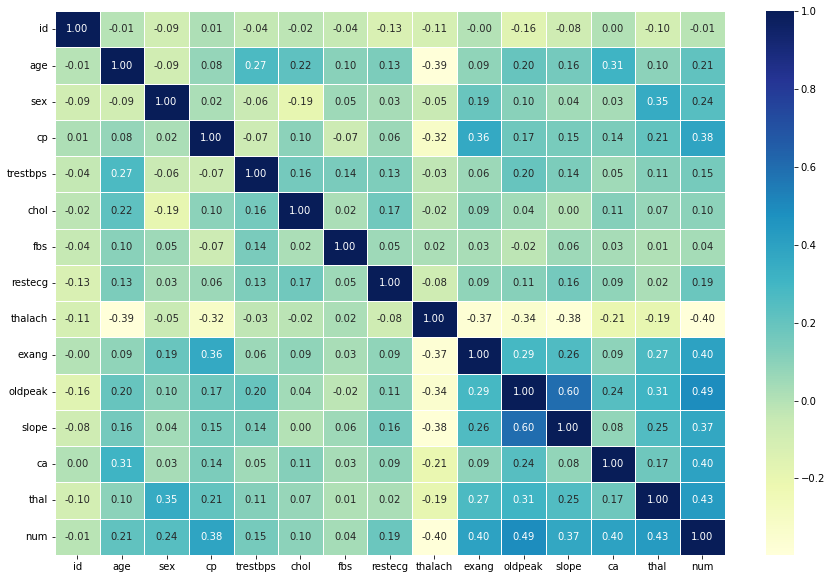

In [6]:
corr_matrix = clev.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

In [7]:
clev = clev.drop(['id'], axis=1)

'id' attribute has nothing to do with predicting because this attribute is just a number to identify each patient.\
Moreove, 'id' attribute is showing correlation which is very close to zero, so delete this attributes from dataset.

***
## Section: 2.3 - Transform the attributes
- Consider transforming the remaining attributes (e.g., using the data dictionary to replace the numbers with text values for some attributes – this might or might not be useful), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit and transform the data
attr = clev[['trestbps', 'chol', 'thalach']]
norm = pd.DataFrame(scaler.fit_transform(attr))
norm
clev[['trestbps', 'chol', 'thalach']] = norm
clev

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,0.481132,0.244292,1,2,0.603053,0,2.3,3,0,6,0
1,67,1,4,0.622642,0.365297,0,2,0.282443,1,1.5,2,3,3,2
2,67,1,4,0.245283,0.235160,0,2,0.442748,1,2.6,2,2,7,1
3,37,1,3,0.339623,0.283105,0,0,0.885496,0,3.5,3,0,3,0
4,41,0,2,0.339623,0.178082,0,2,0.770992,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39,0,3,0.415094,0.214612,0,0,0.618321,0,0.0,2,0,3,0
278,57,1,2,0.566038,0.242009,0,2,0.709924,0,0.0,1,1,3,1
279,58,0,4,0.339623,0.162100,0,0,0.458015,0,0.6,2,0,3,0
280,57,1,4,0.150943,0.477169,0,0,0.549618,1,3.0,2,1,7,2


I chose to do normalization because trestbps, thalach, chol attributes were 3-digit numbers and others are 1 digit numbers.\
I thought it would be nice to make 3-digit numbers into 1 digit numbers to match other attributes.\
Among the normalization approaches, I used min-max normalization to rescale 3 attributes(trestbps, thalach, chol) to a range of (0,1).

***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

y = clev[['num']]
x = clev.drop(['num', 'fbs', 'chol', 'restecg', 'trestbps'], axis=1)

# random state to make it reproducible
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

Set y as a predicted attribute('num').\
I chose to execute 'num' from x because it's a predicted value.\
I chose to execute 'fbs', 'chol', 'restecg', 'trestbps' from x because correlation between these four attributes and 'num' attribute are close to zero according to the correlation matrix.\
\
Using the train_test_split, I set up test and train as a ratio of 3:7.

***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [12]:
# instantiate learning model from k=1 to k=7
for k in range(2,3):

    knn_clf = KNeighborsClassifier(n_neighbors=k)

    # fit the model
    knn_clf.fit(X_train, y_train.squeeze())

    # predicting the test set results
    knn_y_pred = knn_clf.predict(X_test)

    # check for the accuracy
    knn_accuracy = accuracy_score(y_test, knn_y_pred)*100
    print('Accuracy of our model with n_neighbors={} is equal '.format(k) + str(round(knn_accuracy, 2)) + ' %.')

Accuracy of our model with n_neighbors=2 is equal 57.65 %.


Fitted the KNeighborsClassifier models with different number of neighbors, from 1 to 7.\
It seems like the highest accuracy is shown when k=2, which is 57.65%.

In [13]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cm

array([[43,  3,  1,  0,  0],
       [ 7,  4,  1,  0,  1],
       [ 2,  3,  1,  1,  0],
       [ 3,  6,  3,  1,  0],
       [ 2,  2,  1,  0,  0]])

In [14]:
net_benefit = calculate_cost(knn_cm)
net_benefit

16300

In [753]:
from sklearn.model_selection import cross_val_score

# check from k=1 to k=50
k_list = list(range(1,50,1))

# creating list of cv scores
knn_cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_scores = cross_val_score(knn, X_train, y_train.squeeze(), cv=7, scoring='accuracy')
    knn_cv_scores.append(knn_scores.mean())

<Figure size 432x288 with 0 Axes>

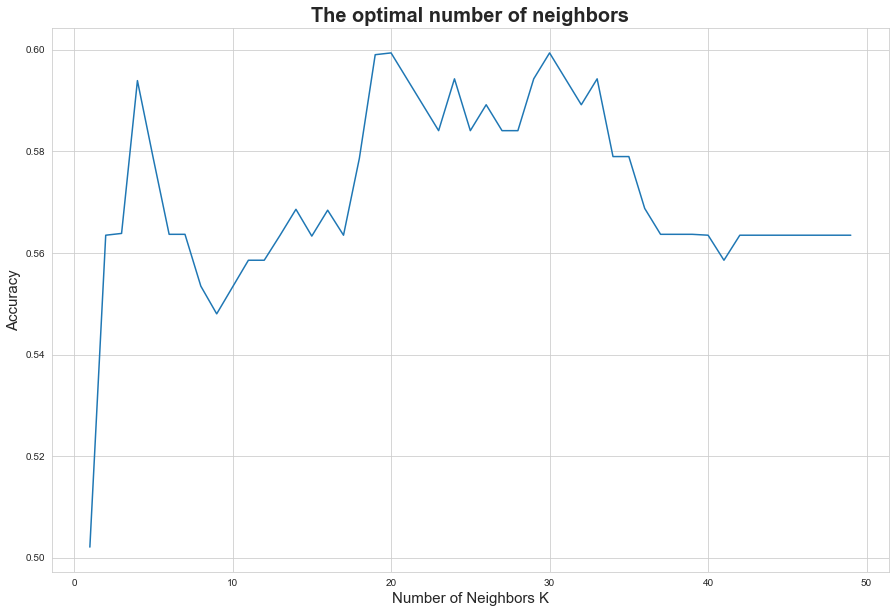

In [754]:
def optimal_knn_value (k_list, knn_cv_scores):

    plt.figure()
    plt.figure(figsize=(15,10))
    plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
    plt.xlabel('Number of Neighbors K', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    sns.set_style("whitegrid")
    plt.plot(k_list, knn_cv_scores)
    plt.show()
    
optimal_knn_value(k_list, knn_cv_scores)

Accuracy for each k and the graph looks a little bit different, but this is becasue of the overfitting.\
Even though there is two more peaks when k=20 and k=30, it is more precise to look at the actual accuracy of each k as a numeric value.

***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

Since I have done the normalization from section 2 and dropped unnecessary attribute, it helped to increase the accuracy of the KNN classifier.\
However, I think using KNN classifier to this dataset was a bad choice because this is a large dataset with large dimension since KNN classifies in terms of distance and the number of nearest neighbors.\
Moreover, there are many categorical attributes which makes it hard to classify because the result might be skewed.\
As shown in the graph, KNN classifier has risk of overfitting.

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

## Logistic Regression (high dimension)

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [774]:
from sklearn.linear_model import LogisticRegression

Imported LogisticRegression from sklearn to fit the logistic regression model.\
x and y that were used in KNN classifiers are also used for this classifier. (No change)

***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [775]:
log_reg = LogisticRegression(max_iter=3000).fit(X_train,y_train.values.ravel())

y_pred=log_reg.predict(X_test)
log_reg.score(X_test,y_test)

print(f'accuracy score:', '{:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy score: 60.00%


In [757]:
knn_cm = confusion_matrix(y_test, y_pred)
knn_cm

array([[42,  4,  0,  1,  0],
       [ 7,  4,  1,  1,  0],
       [ 2,  1,  2,  2,  0],
       [ 3,  3,  2,  3,  2],
       [ 2,  0,  1,  2,  0]])

In [758]:
net_benefit = calculate_cost(knn_cm)
net_benefit

19600

***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

Logistic regression won't overfit easily, but dataset with high dimension are likely to overfit.\
Even though logistic regression has risk of overfitting, this classifier can be used with large dataset like this.\
Regardless of overfitting, the accuracy seems to be higher than the accuracy of KNN and the net_benefit is also higher.\
Therefore, I think logistic regression is a better choice than KNN classifier.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

## Random Forest

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [776]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

# random state to make it reproducible
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [777]:
#Create a Gaussian Classifier
rf_clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train.squeeze())

rf_y_pred=rf_clf.predict(X_test)

In [778]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100
print('Accuracy of our model is equal ' + str(round(rf_accuracy, 2)) + ' %.')

Accuracy of our model is equal 56.47 %.


In [779]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[45,  1,  1,  0,  0],
       [ 7,  2,  2,  2,  0],
       [ 1,  4,  0,  2,  0],
       [ 3,  6,  3,  1,  0],
       [ 1,  1,  2,  1,  0]])

In [780]:
net_benefit = calculate_cost(knn_cm)
net_benefit

19600

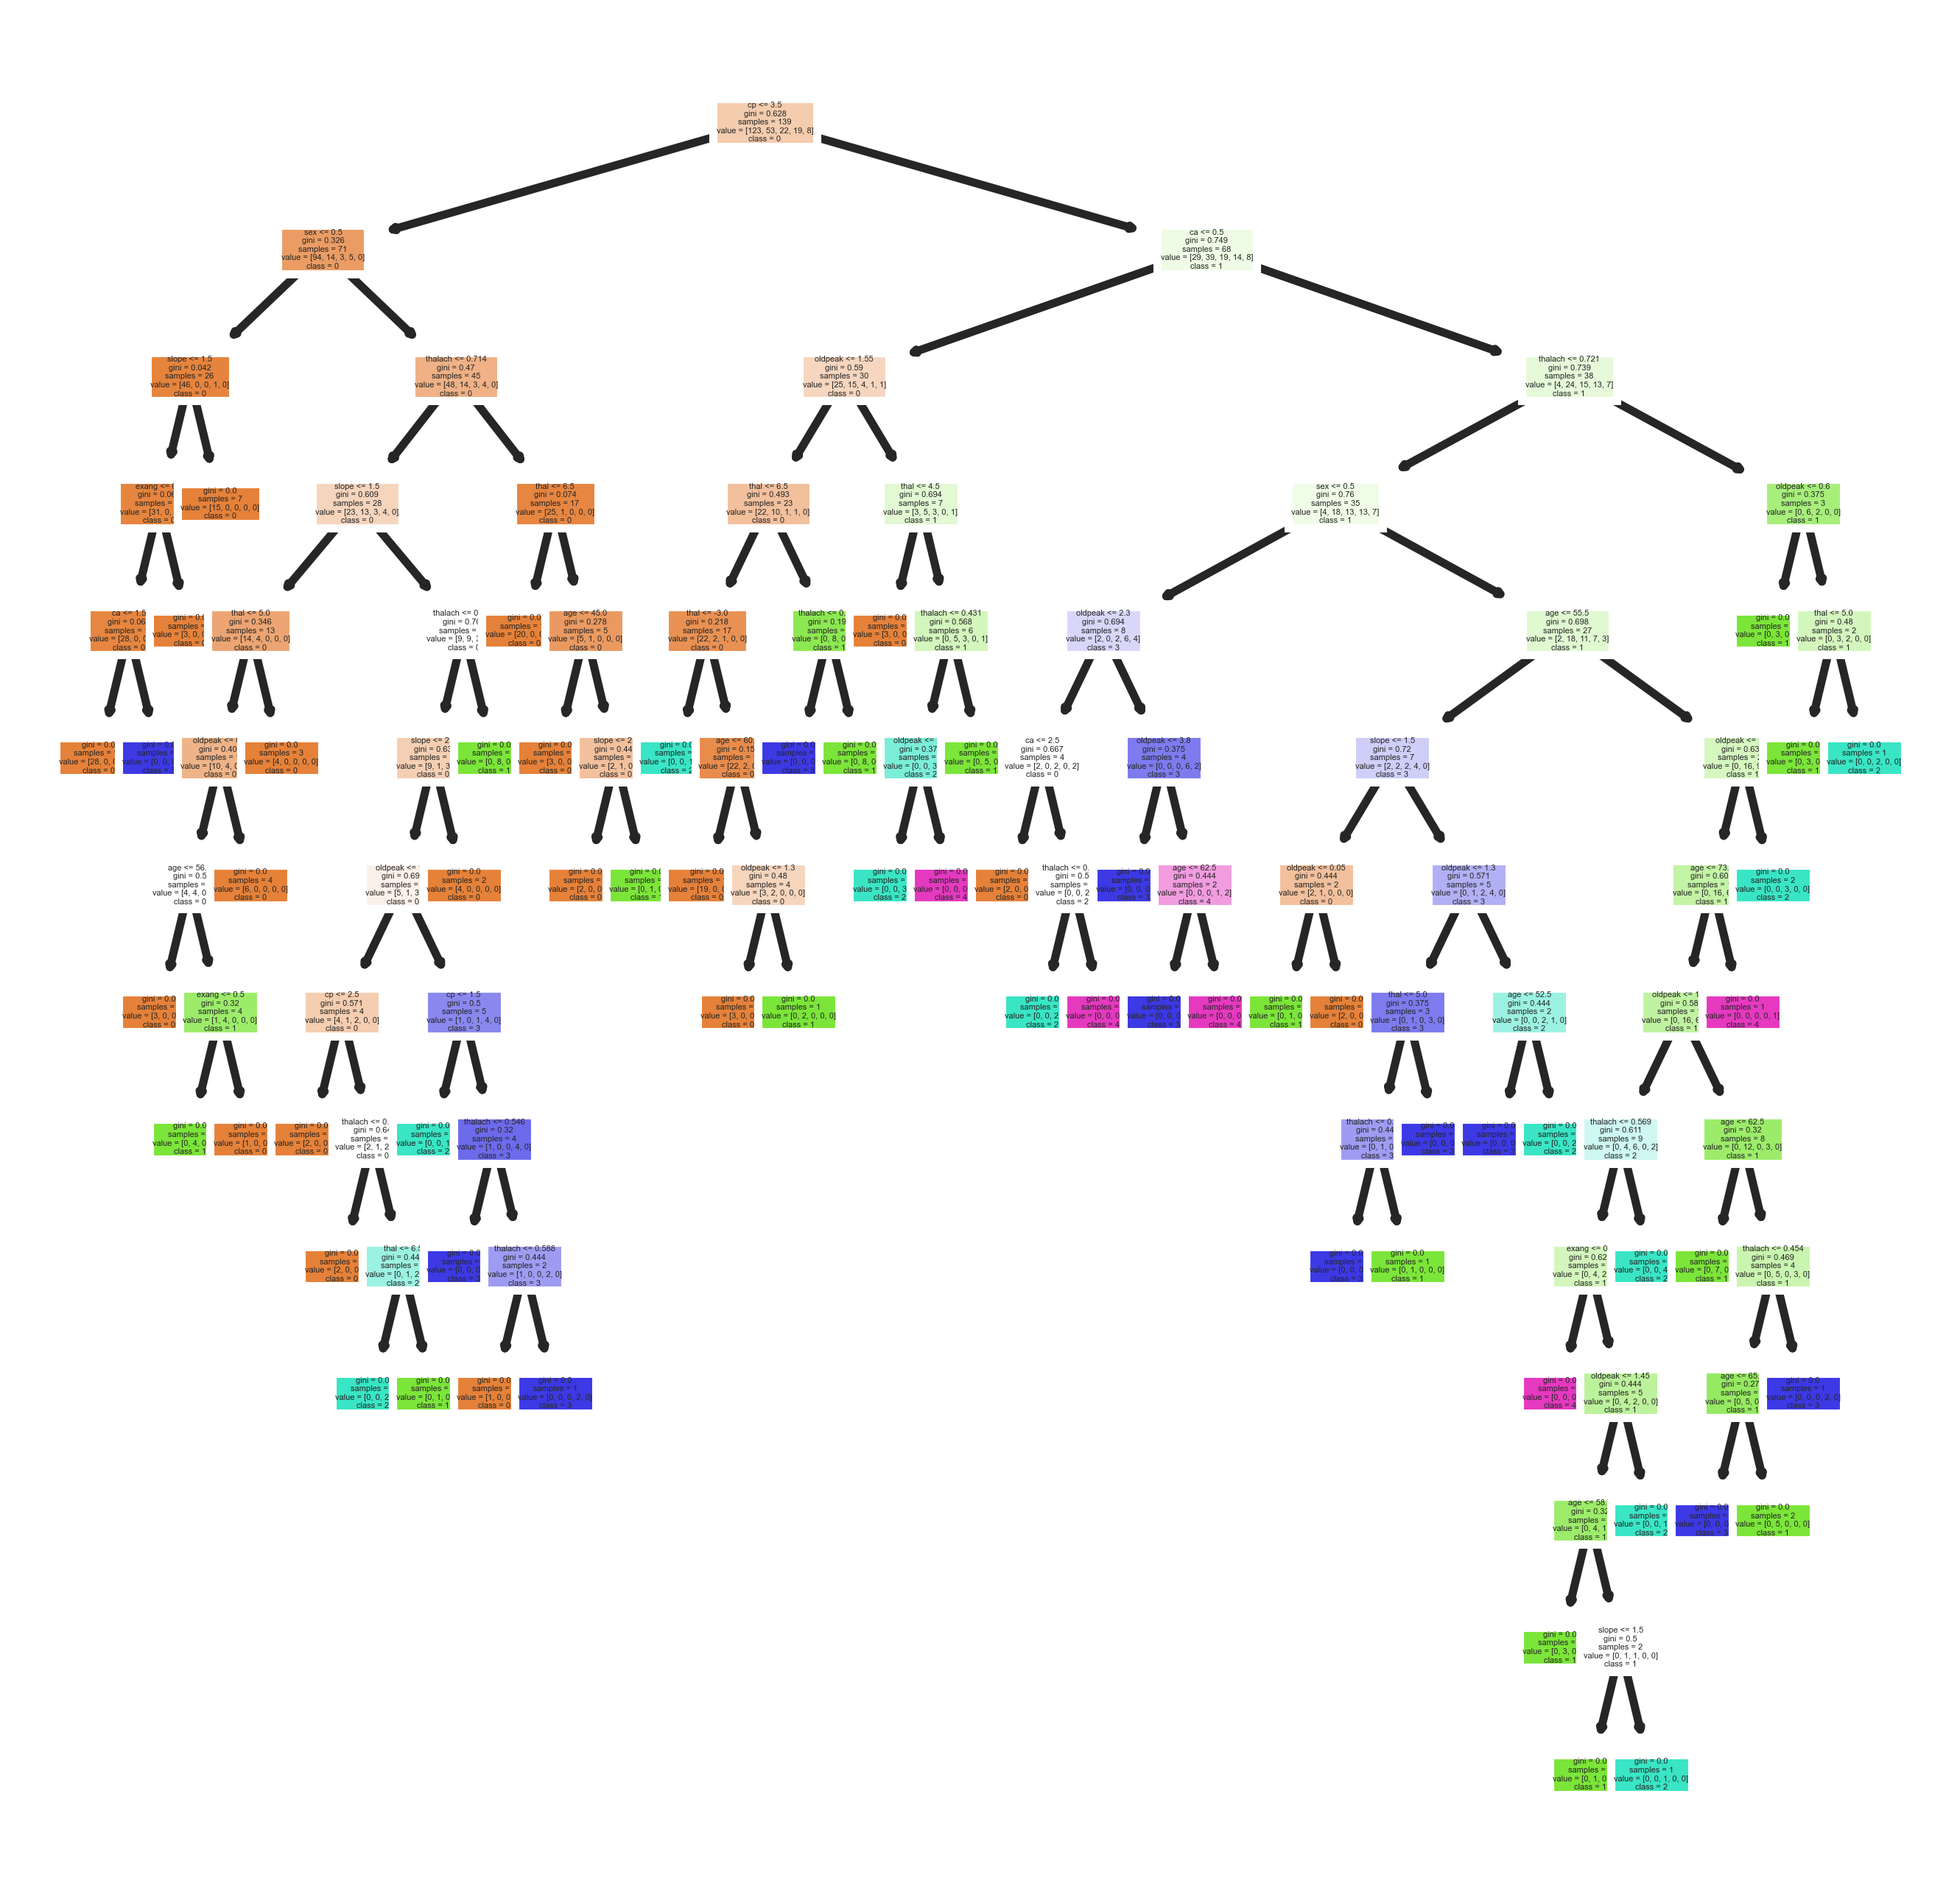

In [781]:
# Creating random forest tree
fn = ['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
cn = ['0','1','2','3','4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True);

***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

Since Random Forest works well in both categorical and continuous attributes, it is a good classifier for this dataset.\
Moreover, Random Forest improves accuracy and reduces overfitting by creating many trees, which are the subsets of the data.\
Even though Random Forest takes longer time to be executed then KNN classifiers, I think it is a better choice than the KNN classifier in terms of accuracy and overfitting.

***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?
***

|         |KNN|Logistic Regression|Random Forest|
|-----------|-----------|-----------|-----------|
|Accuracy|57.65%|60.00%|56.47%|
|Net_benefit|16300|19600|19600|


The table above shows accuracy and net_benefit of each classifiers used in section 3,4 and 5.\
Among the three classifiers, random forest has the lowest accuracy(56.47%) and logistic regression shows the highest accuracy(60.00%).\
Looking at the net_benefit, KNN shows a large positive number. However, net_benefit of logistic regression(19600) and random forest(19600) are larger than the net_benefit of KNN classifier(14800).

***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

Overall, considering both accuracy and net_benefit, Logistic Regression seems to be the best among the three classifiers.\
The reason is that Logistic Regression shows the highest accuracy and highest net_benefit among the classifiers.\
Even though net_benefits of Logistic Regression and Random Forest are the same, the accuracy of Logistic Regression is 3.53% higher than Random Forest.\
Therefore, Logistic Regression is the best classifier when used in this dataset.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight? 
***

From this homework, I learned so many things about classification. First, when choosing which classifier to use for section 4 and 5, I had to study types of classifiers. This helped me to go over the class materials. By actually putting the dataset into each classifiers, I learned how the dataset is classified and how accurate it can be. Second, I think my data analyzing skill improved by doing this homework. Since I had to organize the dataset and do normalization, I had to look closely how this dataset is stored and which attribute is unnecessary. After organizing the dataset, I could see the accuracy of each classifiers increasing and it was very interesting.\
Even though I've done dropping unnecesary attribute and normalizing for better accurcy, I couldn't get a high accuracy. However, I could see which one is better and which one is less accurate. Beyond this project, I want to explore different classifiers with this dataset and see the outputs. Also, I want to try different pre-processing types and see if it increases accuracy.\ 
While I was doing this homework, I thought having more visualized data could help me understand this dataset deeper. Therefore, "future research" might need more visualized data to gain deeper insight. 

***
### END-OF-SUBMISSION
***